# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


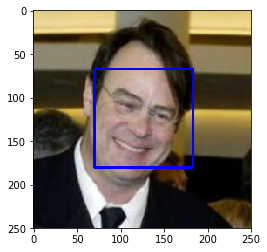

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face? 98%
- What percentage of the first 100 images in `dog_files` have a detected human face? 17%

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
- What percentage of the first 100 images in `human_files` have a detected human face? 98%
- What percentage of the first 100 images in `dog_files` have a detected human face? 17%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
human_human = 0
dog_human = 0
for human_file_short in human_files_short:
    if face_detector(human_file_short):
        human_human += 1
for dog_file_short in dog_files_short:
    if face_detector(dog_file_short):
        dog_human += 1
human_human = human_human / 100
dog_human = dog_human / 100
print(human_human)
print(dog_human)
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


0.98
0.17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

In [35]:

def load_and_preprocess_image(img_path, size=224):
    # Preprocess image data
    image = Image.open(img_path)
    data_transform = transforms.Compose([transforms.RandomResizedCrop(size), transforms.ToTensor(), 
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = data_transform(image).float()
    image = torch.tensor(image, requires_grad=True)
    image = image.unsqueeze(0)
    if use_cuda:
        image = image.cuda()
    return image
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    image = load_and_preprocess_image(img_path)
    output = VGG16(image)
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    return preds # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    index = VGG16_predict(img_path)
    return index <= 268 and index >=151 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog? 0%
- What percentage of the images in `dog_files_short` have a detected dog ? 96%

__Answer:__ 


In [9]:

### on the images in human_files_short and dog_files_short.
dog_human = 0
dog_dog = 0
for human_file_short in human_files_short:
    if dog_detector(human_file_short):
        dog_human += 1
for dog_file_short in dog_files_short:
    if dog_detector(dog_file_short):
        dog_dog += 1
dog_human = dog_human / len(human_files_short)
dog_dog = dog_dog / len(dog_files_short)
print(dog_human)
print(dog_dog)

0.01
0.98


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
from torchvision import datasets


## Specify appropriate transforms, and batch_sizes
train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(225),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
batch_size = 20
num_workers= 0

## Gather Image Folders
train_data = datasets.ImageFolder("/data/dog_images/train", transform=train_transform)
test_data = datasets.ImageFolder("/data/dog_images/test", transform=test_transform)
valid_data = datasets.ImageFolder("/data/dog_images/valid", transform=train_transform)

## Create Image Loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
The code randomly resizes and then does a random but slightly smaller resize of 224 by 224 px. This is what we had used in past CNN implementations and it generalizes pretty well. This will correlate to the convolution and fully conntected layer architecture in the model to utilize this data.
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?
I augmented the data set by doing random horizontal flips and random rotations up to 30 degrees so the model generalizes better to data that it has not seen before.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self, stride = 2):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=stride, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=stride, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully connected layers 
        # First input is diminesion ((224 / 4 * 2) / 4 * 2) / 2 = 7
        self.fc1 = nn.Linear(7 * 7 * 128, 512)
        self.fc2 = nn.Linear(512, 133) 
        
        # drop-out
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # Flatten output of Convolutional layers
        x = x.view(-1, 7 * 7 * 128)
        
        # Fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(self.fc2(x))
        return x


# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
loaders_scratch = { 'train': train_loader, 'test': test_loader, 'valid': valid_loader}

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__
Since we are training it from scratch I wanted to limit the number of trainable nodes in the network. So I took a basic approach with three convolutional layers each followed by a max Pool layer that reduces dimensionality by a factor of two.
Each convolutional kernel would be of size 3 and the first two layers have a span of 2. This is to both redue the number of nodes in the feature extraction layers, and to pick up on more macroscopic features in the first two layers.

Then I needed to define the fully connected layers that would use the extracted features to classify the input.
The number of feature maps in the last layer is 128 and they each have a dimension of size 7 after being reduced in the convolutional layers. I kept the network simple by only using two layers to classify the output (the index of its class 0-133) and introduced a dropout of 30% to ensure the network would not get over fitted during training.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.045)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [13]:
import time
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    print_loss_count = 150
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        start = time.time()
        ###################
        # train the model #
        ###################
        total_ex = 0
        model.train()
        train_load_iter = iter(loaders['train'])
        for i in range(len(loaders['train'])):
            try:
                data, target = next(train_load_iter)
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()

                optimizer.zero_grad()
                output = model(data)
                loss = None
                # for nets that have multiple outputs such as inception
                if isinstance(output, tuple):
                    loss = sum((criterion(o,target) for o in output))
                else:
                    loss = criterion(output, target)

                loss.backward()
                optimizer.step()
                
                train_loss = train_loss + ((1 / (i + 1)) * (loss.data - train_loss))
                if i % print_loss_count == 0:
                    print('Epoch %d, Batch %d Loss %.6f' % (epoch, i + 1, train_loss))
            except:
                print("Error during one training batch: {}".format(sys.exc_info()[0]))
                total_ex += 1
                if total_ex >= 5:
                    return model
        ######################    
        # validate the model #
        ######################
        model.eval()
        valid_load_iter = iter(loaders['valid'])
        for i in range(len(loaders['valid'])):
            try:                 
                data, target = next(valid_load_iter)
                 # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                output = model(data)
                loss = None
                # for nets that have multiple outputs such as inception
                if isinstance(output, tuple):
                    loss = sum((criterion(o,target) for o in output))
                else:
                    loss = criterion(output, target)
                loss = criterion(output, target)
                valid_loss = valid_loss + ((1 / (i + 1)) * (loss.data - valid_loss))
            except:
                print("Error during one validation batch")
                total_ex += 1
                if total_ex >= 5:
                    return model

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}\t Time:{:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            time.time() - start
            ))
        
        ## save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

    # return trained model
    return model





In [14]:
# train the model
model_scratch = train(23, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch 1, Batch 1 Loss 4.877925
Epoch 1, Batch 151 Loss 4.887744
Epoch 1, Batch 301 Loss 4.882126
Epoch: 1 	Training Loss: 4.880590 	Validation Loss: 4.855336	 Time:125.501576
Validation loss decreased (inf --> 4.855336).  Saving model ...
Epoch 2, Batch 1 Loss 4.927311
Epoch 2, Batch 151 Loss 4.849383
Epoch 2, Batch 301 Loss 4.832697
Epoch: 2 	Training Loss: 4.831023 	Validation Loss: 4.778316	 Time:109.041429
Validation loss decreased (4.855336 --> 4.778316).  Saving model ...
Epoch 3, Batch 1 Loss 4.625662
Epoch 3, Batch 151 Loss 4.745850
Epoch 3, Batch 301 Loss 4.749163
Epoch: 3 	Training Loss: 4.748573 	Validation Loss: 4.719628	 Time:108.758982
Validation loss decreased (4.778316 --> 4.719628).  Saving model ...
Epoch 4, Batch 1 Loss 4.715961
Epoch 4, Batch 151 Loss 4.721776
Epoch 4, Batch 301 Loss 4.705780
Epoch: 4 	Training Loss: 4.708431 	Validation Loss: 4.627018	 Time:106.755208
Validation loss decreased (4.719628 --> 4.627018).  Saving model ...
Epoch 5, Batch 1 Loss 4.47168

In [15]:

model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = None
        # for nets that have multiple outputs such as inception
        if isinstance(output, tuple):
            loss = sum((criterion(o,target) for o in output))
        else:
            loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [17]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.931530


Test Accuracy: 12% (108/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
## Specify appropriate transforms, and batch_sizes
train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(300),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
batch_size = 20
num_workers= 0

## Gather Image Folders
train_data = datasets.ImageFolder("/data/dog_images/train", transform=train_transform)
test_data = datasets.ImageFolder("/data/dog_images/test", transform=test_transform)
valid_data = datasets.ImageFolder("/data/dog_images/valid", transform=train_transform)

## Create Image Loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

In [23]:
loaders_transfer = { 'train': train_loader, 'test': test_loader, 'valid': valid_loader}

inception = models.inception_v3(pretrained=True)
print(inception)
for param in inception.parameters():
    param.requires_grad = False
for param in inception.fc.parameters():
    param.requires_grad = True

'''
vgg16 = models.vgg16(pretrained=True)
print(vgg16)
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False
'''


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

'\nvgg16 = models.vgg16(pretrained=True)\nprint(vgg16)\n# Freeze training for all "features" layers\nfor param in vgg16.features.parameters():\n    param.requires_grad = False\n'

In [24]:
import torchvision.models as models
import torch.nn as nn


# Replace last layer with trainable fully connected layer
inception.fc = nn.Linear(2048, 133)
model_transfer = inception
#vgg16.classifier[6] = nn.Linear(4096, 133)
#model_transfer = vgg16

if use_cuda:
    model_transfer = model_transfer.cuda()
print(model_transfer)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I chose the vgg16 model because it is trained off a large and diverse dataset that can allow use distinguish many features within an image. I decided to only replace the last linear layer with a new one that takes in 4096 feature inputs and maps them to the likelyhood of each breed (133). Since we are just identifying types of dogs these 4096 rich features should be more than enough to handle the problem at hand.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [25]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
# train the model
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Epoch 1, Batch 1 Loss 13.524309
Epoch 1, Batch 151 Loss 13.766931
Epoch 1, Batch 301 Loss 13.753285
Epoch: 1 	Training Loss: 13.746978 	Validation Loss: 4.824925	 Time:130.472569
Validation loss decreased (inf --> 4.824925).  Saving model ...
Epoch 2, Batch 1 Loss 13.181475
Epoch 2, Batch 151 Loss 13.655405
Epoch 2, Batch 301 Loss 13.657125
Epoch: 2 	Training Loss: 13.655477 	Validation Loss: 4.725326	 Time:130.983366
Validation loss decreased (4.824925 --> 4.725326).  Saving model ...
Epoch 3, Batch 1 Loss 14.219582
Epoch 3, Batch 151 Loss 13.627882
Epoch 3, Batch 301 Loss 13.593797
Epoch: 3 	Training Loss: 13.587034 	Validation Loss: 4.630028	 Time:131.045362
Validation loss decreased (4.725326 --> 4.630028).  Saving model ...
Epoch 4, Batch 1 Loss 13.820490
Epoch 4, Batch 151 Loss 13.504223
Epoch 4, Batch 301 Loss 13.497600
Epoch: 4 	Training Loss: 13.496197 	Validation Loss: 4.550833	 Time:130.649810
Validation loss decreased (4.630028 --> 4.550833).  Saving model ...
Epoch 5, Batc

In [27]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [29]:
# Train for some more epochs

# train the model
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch 1, Batch 1 Loss 12.994335
Epoch 1, Batch 151 Loss 13.008112
Epoch 1, Batch 301 Loss 12.984624
Epoch: 1 	Training Loss: 12.970472 	Validation Loss: 3.979624	 Time:130.561819
Validation loss decreased (inf --> 3.979624).  Saving model ...
Epoch 2, Batch 1 Loss 12.899229
Epoch 2, Batch 151 Loss 12.912000
Epoch 2, Batch 301 Loss 12.915133
Epoch: 2 	Training Loss: 12.907396 	Validation Loss: 3.885487	 Time:129.576891
Validation loss decreased (3.979624 --> 3.885487).  Saving model ...
Epoch 3, Batch 1 Loss 13.017162
Epoch 3, Batch 151 Loss 12.897847
Epoch 3, Batch 301 Loss 12.855989
Epoch: 3 	Training Loss: 12.852398 	Validation Loss: 3.821324	 Time:132.051311
Validation loss decreased (3.885487 --> 3.821324).  Saving model ...
Epoch 4, Batch 1 Loss 12.160360
Epoch 4, Batch 151 Loss 12.823883
Epoch 4, Batch 301 Loss 12.769377
Epoch: 4 	Training Loss: 12.773669 	Validation Loss: 3.776074	 Time:132.057852
Validation loss decreased (3.821324 --> 3.776074).  Saving model ...
Epoch 5, Batc

In [30]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [31]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 3.075823


Test Accuracy: 65% (550/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [39]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]
def predict_breed_transfer(img_path, model, classes):
    # load the image and return the predicted breed
    image = load_and_preprocess_image(img_path, 299)
    if use_cuda:
        model.cuda()
    model.eval()
    idx = torch.argmax(model(image))
    return classes[idx]


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [40]:

def run_app(img_path, model, classes):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path) == True:
        pred = predict_breed_transfer(img_path, model, classes)
        print("Doggo Found! Looks like the floofer is a {}.".format(pred))
    elif face_detector(img_path) > 0:
        pred = predict_breed_transfer(img_path, model, classes)
        print("Hello, human! You are the human version of a {}".format(pred))
    else:
        print("Error, unable to detect human or dog faces")
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.



__Answer:__ 
- It did better than I expected with my images. It finally showed me what breed my mutt of a doggo might be :)
- It managed to find all the humans and always found the dogs even though it guessed the wrong breed for the westie.
- It did not detect dogs or humans for the cat picture provided

1) More Epochs: if we run more epochs and tune the hyperparameters we could get some better performance.
2) Better/Bigger DataSet: With more and better data our model could better learn less common breeds. We may even include more breeds.
3) Better input Image agumentation: Do more image augmentation to make the model generalize better (More rotation, resizing, clipping, etc)

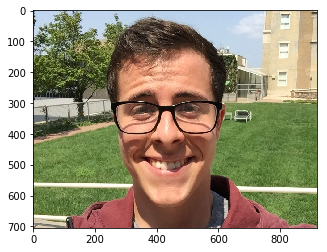

Hello, human! You are the human version of a Italian greyhound


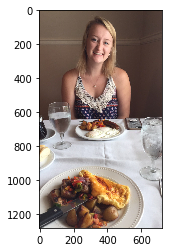

Hello, human! You are the human version of a Afghan hound


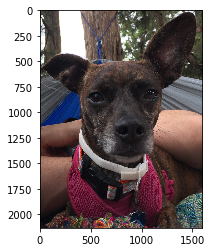

Doggo Found! Looks like the floofer is a Boston terrier.


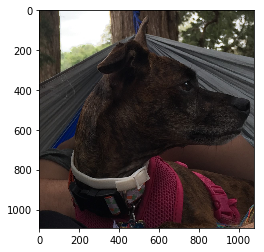

Error, unable to detect human or dog faces


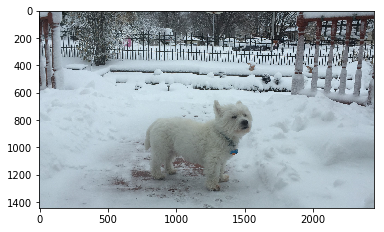

Doggo Found! Looks like the floofer is a Great pyrenees.


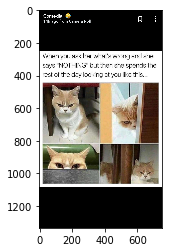

Error, unable to detect human or dog faces


In [41]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
my_files = ["images/IMG-1.JPG", "images/IMG-2.JPG",
            "images/IMG-3.JPG", "images/IMG-4.JPG",
            "images/IMG-5.JPG", "images/IMG-6.PNG"]
for file in my_files:
    run_app(file, model_transfer, class_names)